In [56]:
!pip install pandas seaborn matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
# Load dataset
df = pd.read_csv('full.csv')

In [58]:
# Drop unnecessary columns
columns_to_drop = ['SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

In [59]:
# Handling null values in Age(filling the median age grouped by Gender and Class)
df['Age'] = df.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))

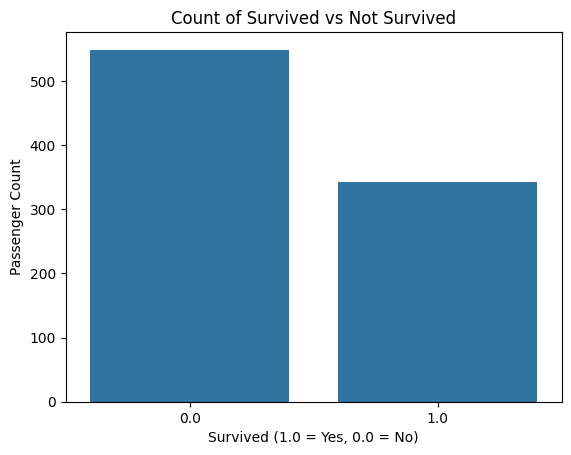

In [53]:
# Countplot: Survived vs Not Survived
sns.countplot(x='Survived', data=df)
plt.title('Count of Survived vs Not Survived')
plt.xlabel('Survived (1.0 = Yes, 0.0 = No)')
plt.ylabel('Passenger Count')
plt.show()

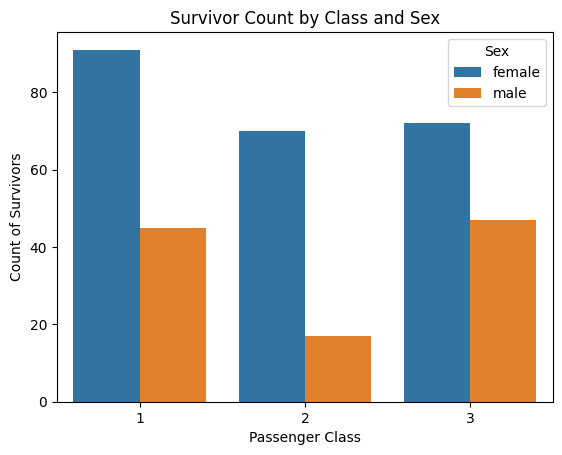

In [55]:
# Filter survivors and aggregate counts in one step with value_counts
count_data = df[df['Survived'] == 1].groupby(['Pclass', 'Sex']).size().reset_index(name='Count')

# Plot with seaborn.barplot
sns.barplot(data=count_data, x='Pclass', y='Count', hue='Sex',)

plt.title('Survivor Count by Class and Sex')
plt.xlabel('Passenger Class')
plt.ylabel('Count of Survivors')
plt.legend(title='Sex')
plt.show()


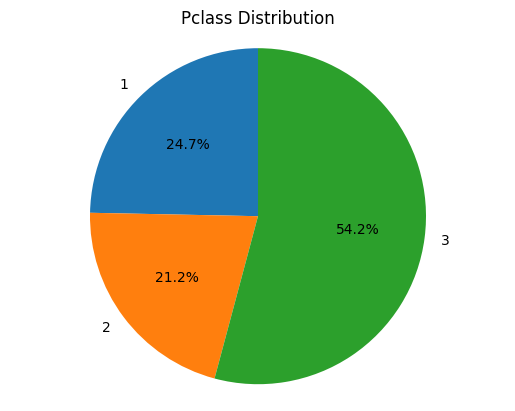

In [50]:
# Pie Chart: Class Distribution
pclass_counts = df['Pclass'].value_counts().sort_index()
plt.pie(pclass_counts, labels=pclass_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Pclass Distribution')
plt.axis('equal')
plt.show()

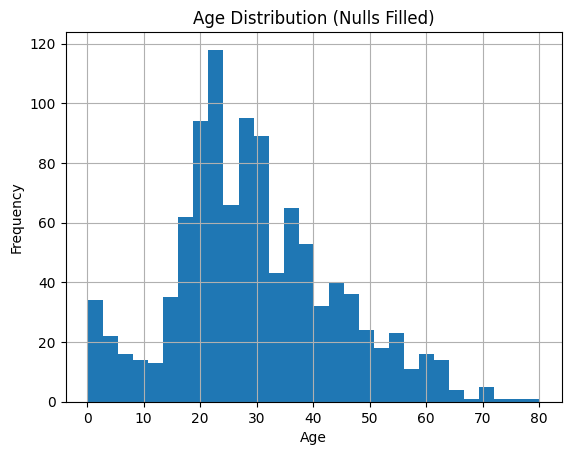

In [51]:
# Histogram: Age Distribution
df['Age'].hist(bins=30)
plt.title('Age Distribution (Nulls Filled)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()